In [61]:
# Modelling data

In [62]:
# Loading
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("df_3.csv", sep=",")
df

,SAPS-I,Creatinine_last_log,BUN_last_log,SOFA,Age,Na_last,Weight,NIMAP_first,NIMAP_last,Weight_last,...,SysABP_diff,DiasABP_diff,FiO2_diff,Lactate_diff,In-hospital_death,CCU,CSRU,SICU,Gender,MechVentLast8Hour
0,0.300668,0.333993,0.085820,0.391428,0.654019,-0.902033,-0.237425,-1.825970,-6.141845e-01,-0.156409,...,0.032026,1.106864,1.397652,7.908244e-17,0,0,1,0,1.0,0.0
1,1.122315,-1.948867,-2.668222,1.101179,-1.176765,-0.204228,-1.096743,1.260974,1.826724e+00,-1.396883,...,0.834433,0.736089,1.397652,-1.764760e-01,0,0,0,0,0.0,1.0
2,-0.027991,-0.629755,-0.299047,1.101179,-0.032525,-0.669431,1.454497,1.382102,-1.083075e+00,0.000000,...,2.318884,0.958554,-0.781002,7.908244e-17,0,1,0,0,1.0,1.0
3,0.793656,-0.869744,1.523650,0.391428,0.768443,-0.436830,-1.466295,-0.735819,-1.927924e+00,-1.810374,...,-0.970982,1.032709,1.397652,-7.463250e-01,1,0,0,0,0.0,1.0
4,-0.027991,0.333993,0.151660,-0.081740,0.539595,0.028374,-0.678215,0.193232,-5.902471e-01,-0.749246,...,-1.492546,-0.747011,0.961921,7.908244e-17,0,0,1,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3736,0.300668,0.209379,-0.299047,0.864595,0.882867,0.028374,0.274604,0.516038,4.890468e-01,0.301919,...,-1.773388,-1.191942,0.090460,7.908244e-17,0,0,1,0,1.0,0.0
3737,0.793656,-0.869744,-1.113358,-0.081740,-0.719069,0.260976,-0.059328,0.000000,1.000502e-15,0.000000,...,-0.128455,0.661934,-0.345271,7.908244e-17,1,0,0,1,1.0,1.0
3738,-0.356650,1.528490,1.727806,0.628011,0.425171,1.191382,4.615720,0.657152,4.658134e-01,0.000000,...,0.874553,0.291159,-0.563136,-4.614005e-01,0,1,0,0,0.0,0.0
3739,0.629327,-0.074468,0.332582,1.101179,-0.719069,-1.134635,0.648608,0.758293,-1.318225e+00,0.570937,...,-0.048214,0.365314,0.961921,7.495288e-01,1,0,0,0,1.0,1.0


In [63]:
print(df['In-hospital_death'].value_counts())

0    3150
1     591
Name: In-hospital_death, dtype: int64


In [64]:
#Downsampling
#separare in righe per target
t0=df[df['In-hospital_death']==0]
t1=df[df['In-hospital_death']==1]
print("t0 e t1: ", len(t0), len(t1))

t0 e t1:  3150 591


In [65]:
from sklearn.utils import resample
t0_down = resample(t0, replace=True, n_samples=591, random_state=123)
print("t0 down: ", len(t0_down))

t0 down:  591


In [66]:
df = pd.concat([t0_down, t1])
df

,SAPS-I,Creatinine_last_log,BUN_last_log,SOFA,Age,Na_last,Weight,NIMAP_first,NIMAP_last,Weight_last,...,SysABP_diff,DiasABP_diff,FiO2_diff,Lactate_diff,In-hospital_death,CCU,CSRU,SICU,Gender,MechVentLast8Hour
1604,-0.685309,-0.629755,-1.280057,-0.081740,-0.490221,-0.204228,0.252342,1.606189,-2.149936e-01,0.112610,...,-8.908499e-18,0.000000,-0.345271,-3.189382e-01,0,0,0,1,1.0,1.0
1342,0.136339,-0.421867,-1.469043,-0.318323,-2.664278,-0.204228,-0.348736,0.233204,3.010680e-01,-0.744264,...,9.949138e-01,-0.005461,1.397652,-1.052448e-01,0,0,0,1,1.0,1.0
2099,0.957986,0.073916,0.151660,1.101179,0.196323,0.493577,1.663761,-1.785392,-9.894380e-01,0.000000,...,-1.532666e+00,-0.153771,1.397652,7.908244e-17,0,0,1,0,1.0,0.0
3658,-0.520979,-0.238498,-0.829350,0.391428,-0.719069,0.493577,1.539093,0.000000,1.000502e-15,1.328174,...,-4.895378e-01,-0.450391,0.526190,7.908244e-17,0,0,1,0,0.0,0.0
2553,1.450974,-1.500990,-1.687212,1.574346,-2.378218,1.656586,-0.575809,0.576602,-9.190340e-01,-0.814009,...,-1.011102e+00,-0.524546,-1.652463,-1.102481e+00,0,0,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,1.450974,0.209379,1.662972,1.574346,0.196323,0.493577,0.697585,-1.623686,-7.078219e-01,0.000000,...,-8.833465e-02,-0.450391,1.397652,4.738472e+00,1,1,0,0,1.0,1.0
3729,-0.192320,0.073916,1.618038,1.574346,0.940079,0.958781,-0.949813,0.000000,1.000502e-15,-0.978410,...,1.195515e+00,0.291159,-0.781002,5.358354e-01,1,0,0,0,0.0,1.0
3731,0.300668,0.924799,1.132670,1.101179,1.454988,0.260976,-1.426223,0.000000,1.000502e-15,-1.765537,...,3.931091e-01,-0.227926,0.961921,2.509108e-01,1,0,1,0,0.0,1.0
3737,0.793656,-0.869744,-1.113358,-0.081740,-0.719069,0.260976,-0.059328,0.000000,1.000502e-15,0.000000,...,-1.284550e-01,0.661934,-0.345271,7.908244e-17,1,0,0,1,1.0,1.0


In [67]:
# Train test split

#TROVARE MODO DI PESARE IL TARGET

from sklearn.model_selection import train_test_split
y=df['In-hospital_death']
x= df.drop(['In-hospital_death'], axis=1)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.3, stratify=y, random_state=123)

print(X_train.shape, X_test.shape)
type(y_train)

(827, 39) (355, 39)


pandas.core.series.Series

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import numpy as np

In [69]:
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=5, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    print("f1_test: ", f1_score(y_test, y_pred), "\n\n")
    print(confusion_matrix(y_test, y_pred), "\n\n")
    print(classification_report(y_test, y_pred), "\n\n")

    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='purple')

    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')
    plt.show()

In [70]:
def roc(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test)

    fpr, tpr, thresholds1 = metrics.roc_curve(y_test, y_probs[:, 1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('FP Rate')
    plt.ylabel('TP Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:, 1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

f1_train: 0.659158 using {'n_neighbors': 10}
f1_test:  0.7 


[[121  57]
 [ 51 126]] 


              precision    recall  f1-score   support

           0       0.70      0.68      0.69       178
           1       0.69      0.71      0.70       177

    accuracy                           0.70       355
   macro avg       0.70      0.70      0.70       355
weighted avg       0.70      0.70      0.70       355
 




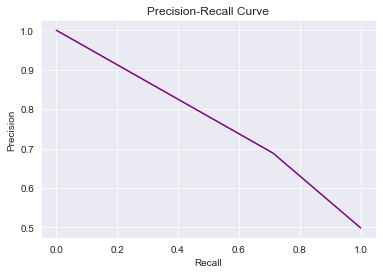

In [71]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,100, 1000)}
hyperp_search(classifier,parameters)

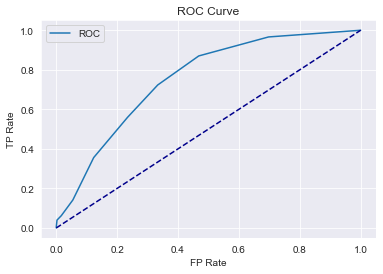

AUC: 0.75


In [53]:
model_knn = KNeighborsClassifier(n_neighbors=10)

fpr1, tpr1 = roc(model_knn, X_train, y_train, X_test, y_test)

f1_train: 0.749472 using {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 20}
f1_test:  0.7005076142131981 


[[ 99  79]
 [ 39 138]] 


              precision    recall  f1-score   support

           0       0.72      0.56      0.63       178
           1       0.64      0.78      0.70       177

    accuracy                           0.67       355
   macro avg       0.68      0.67      0.66       355
weighted avg       0.68      0.67      0.66       355
 




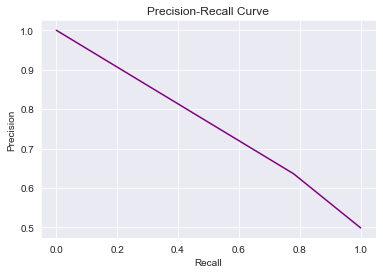

In [72]:
#Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 'max_depth': [4,5,10], 'min_samples_split': [20],'min_samples_leaf': [10], 'class_weight':['balanced']}

hyperp_search(classifier,parameters)

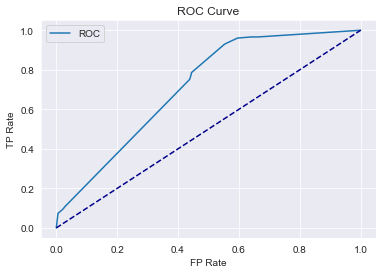

AUC: 0.71


In [73]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10, min_samples_split=20)

fpr2,tpr2=roc(model_tree,X_train,y_train,X_test,y_test)

In [74]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.7335092348284961
f1_test:  0.7335092348284961
[[115  63]
 [ 38 139]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       178
           1       0.69      0.79      0.73       177

    accuracy                           0.72       355
   macro avg       0.72      0.72      0.71       355
weighted avg       0.72      0.72      0.71       355



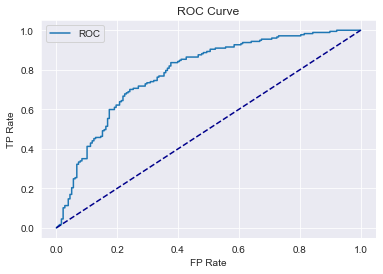

AUC: 0.78


In [75]:
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case)

fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)

f1_train: 0.758903 using {'C': 0.0001, 'class_weight': 'balanced', 'max_iter': 1000}
f1_test:  0.720626631853786 


[[110  68]
 [ 39 138]] 


              precision    recall  f1-score   support

           0       0.74      0.62      0.67       178
           1       0.67      0.78      0.72       177

    accuracy                           0.70       355
   macro avg       0.70      0.70      0.70       355
weighted avg       0.70      0.70      0.70       355
 




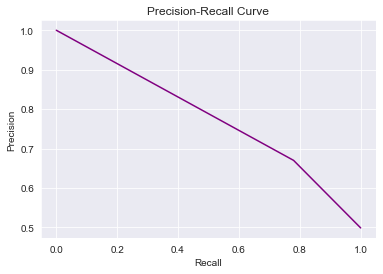

In [76]:
# Logistic

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "max_iter":[1000], 'class_weight':['balanced']}


hyperp_search(classifier,parameters)

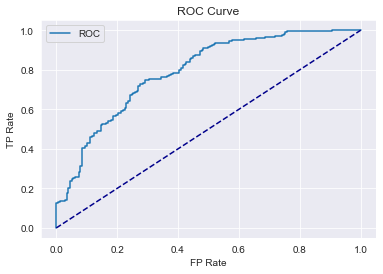

AUC: 0.79


In [77]:
model = LogisticRegression(C=0.0001, max_iter=1000, class_weight='balanced')

fpr4,tpr4=roc(model,X_train,y_train,X_test,y_test)

f1_train: 0.782273 using {'C': 1, 'class_weight': 'balanced', 'kernel': 'rbf'}
f1_test:  0.7562189054726368 


[[105  73]
 [ 25 152]] 


              precision    recall  f1-score   support

           0       0.81      0.59      0.68       178
           1       0.68      0.86      0.76       177

    accuracy                           0.72       355
   macro avg       0.74      0.72      0.72       355
weighted avg       0.74      0.72      0.72       355
 




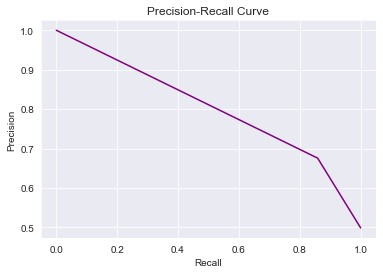

In [79]:
#SVM

from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear', 'rbf'], "C":[0.1, 1], "class_weight":['balanced']}

hyperp_search(classifier,parameters)

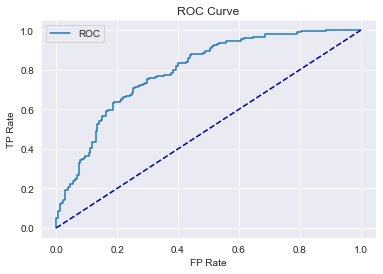

AUC: 0.80


In [80]:
model = SVC(C=0.1, kernel='rbf',probability=True, class_weight='balanced')

fpr5,tpr5=roc(model,X_train,y_train,X_test,y_test)

f1_train: 0.712689 using {'alpha': 0.1, 'hidden_layer_sizes': (20, 5), 'max_iter': 1000}
f1_test:  0.6944444444444444 


[[120  58]
 [ 52 125]] 


              precision    recall  f1-score   support

           0       0.70      0.67      0.69       178
           1       0.68      0.71      0.69       177

    accuracy                           0.69       355
   macro avg       0.69      0.69      0.69       355
weighted avg       0.69      0.69      0.69       355
 




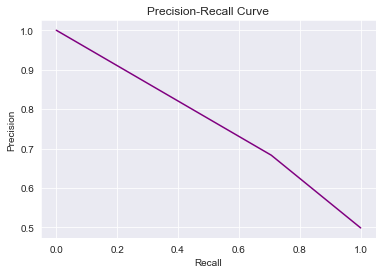

In [81]:
# Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(20,5)],  "max_iter": [1000], "alpha": [0.001,0.1]}

hyperp_search(classifier,parameters)

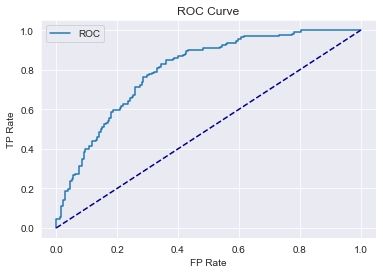

AUC: 0.80


In [82]:
model_MLP=MLPClassifier(hidden_layer_sizes=(20,5), alpha=0.1, max_iter=1000)

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)

In [91]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=50, random_state=123)
parameters={'criterion': ['entropy','gini'], 'max_depth': [4,5,10], 'min_samples_leaf': [5, 10],'min_samples_split': [5, 10]}

def hyperp_search(classifier, parameters):
    gs=GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs=gs.fit(X_train, y_train)
    print("f1_train: %f using %s" %(gs.best_score_, gs.best_params_))

    best_model=gs.best_estimator_
    y_pred=best_model.predict(X_test)

    print("f1_test: ", f1_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

hyperp_search(classifier,parameters)

f1_train: 0.783287 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
f1_test:  0.7839195979899498
[[113  65]
 [ 21 156]]
              precision    recall  f1-score   support

           0       0.84      0.63      0.72       178
           1       0.71      0.88      0.78       177

    accuracy                           0.76       355
   macro avg       0.77      0.76      0.75       355
weighted avg       0.77      0.76      0.75       355



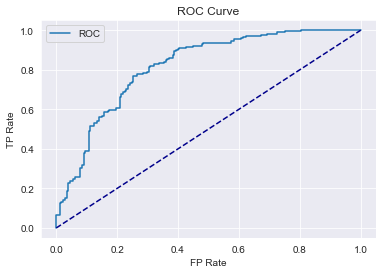

AUC: 0.82


In [92]:
model_RF=RandomForestClassifier(criterion='gini', max_depth=10, min_samples_leaf=5, min_samples_split=5)

fpr7,tpr7=roc(model_RF,X_train,y_train,X_test,y_test)

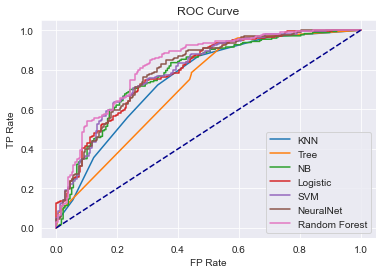

In [90]:
import matplotlib.pyplot as plt
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot(fpr7, tpr7, label= "Random Forest")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# models vari

# SVM

# k-NN

# Tree / Random forest

# Ada boost (?) random forest con diversi modelli

# Neural network composta di pochi dense layer insieme


# all to use with class_weight parameter 

#DecisionTreeClassifier
#LogisticRegression
#RidgeClassifier
#The Keras Python Deep Learning 

In [ ]:
# Performances:
# minimum sensitivity and precision
# area under precision-recall curve
# area under reciving operating curve




In [ ]:
# Computing sensitivity and precision 
def metrics(): 
    results = []
    
    return results
    

In [ ]:
# ROC curve function 
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


def ROC_curve(model, testX, testy)
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(testy))]
    lr_probs = model.predict_proba(testX)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(testy, ns_probs)
    lr_auc = roc_auc_score(testy, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()